# Atelier 6 : Apprentissage non supervisé (Clustering)

                                                                                               Réalisé par : chaimaa BOUABD

## 1- Chargement et visualisation des données .

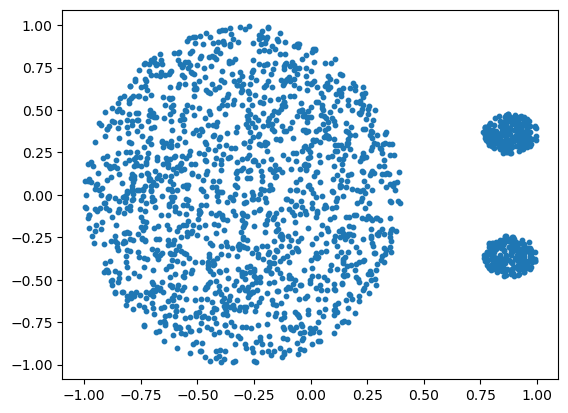

In [78]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

data1 = arff.loadarff(open('data/cure-t0-2000n-2D.arff', 'r'))
dataset1 = np.array(data1[0])

# Extraire les coordonnées des points de données.
x1 = dataset1['x']
#.astype(np.float64)
y1 = dataset1['y']
#.astype(np.float64)

# Créer une nouvelle figure .
plt.figure()

# Tracer les points de données .
plt.scatter(x1, y1, s=10)  # s est la taille des points

# Afficher la figure 
plt.show()


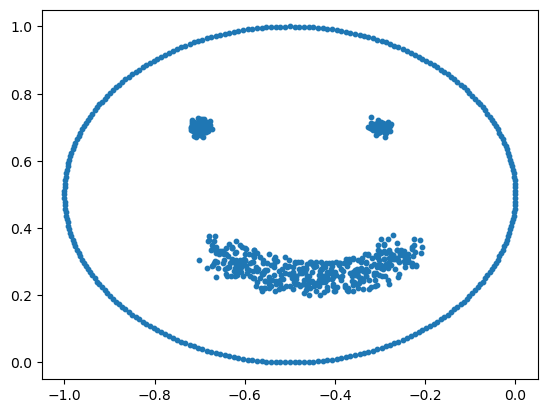

In [79]:
data2 = arff.loadarff(open('data/smile2.arff', 'r'))
dataset2 = np.array(data2[0])

# Extraire les coordonnées des points de données.
x2 = dataset3['a0'].astype(np.float64)
y2 = dataset3['a1'].astype(np.float64)

# Créer une nouvelle figure .
plt.figure()

# Tracer les points de données .
plt.scatter(x2, y2, s=10)  # s est la taille des points

# Afficher la figure 
plt.show()

## 2-  Clustering k-Means

C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


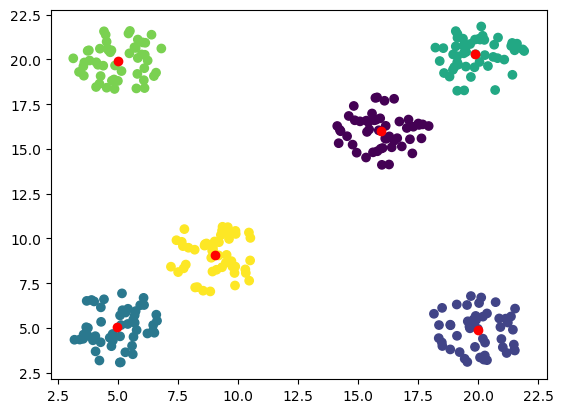

In [80]:
from sklearn.cluster import KMeans

data1 = arff.loadarff(open('data/spherical_6_2.arff', 'r'))
dataset1 = np.array(data1[0])

# Extraire les coordonnées des points de données.
x1 = dataset1['x']
#.astype(np.float64)
y1 = dataset1['y']
#.astype(np.float64)

# Création du tableau de données
data_points1 = np.column_stack((x1, y1))

# Application de la méthode k-Means
k = 6  # Nombre de clusters attendus
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(data_points1)

# Obtention des étiquettes de cluster assignées à chaque exemple
labels = kmeans.labels_

# Finding the centroids
kmeans.cluster_centers_
plt.scatter(x1, y1, c=kmeans.predict(data_points1))

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')



In [81]:
# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(data_points1, labels)

print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.3554559438016451


indice de Davies-Bouldin bas indique une meilleure séparation des clusters.

In [82]:
silhouette_avg = silhouette_score(data_points1, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7481333160964553


Détermination automatique du nombre de clusters
 Utilisation des métriques d'évaluation : Indice de Davies-Bouldin et Coefficient de silhouette

C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chaim\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

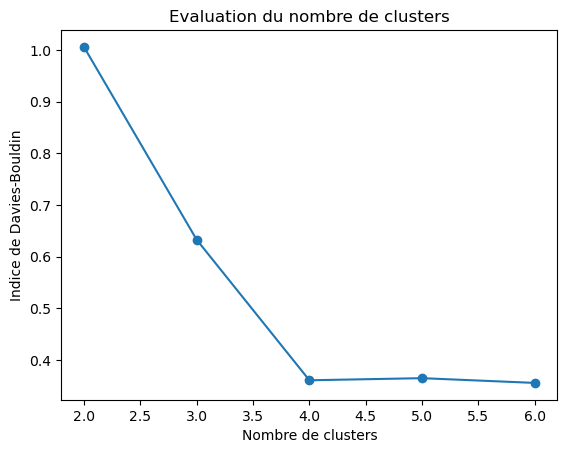

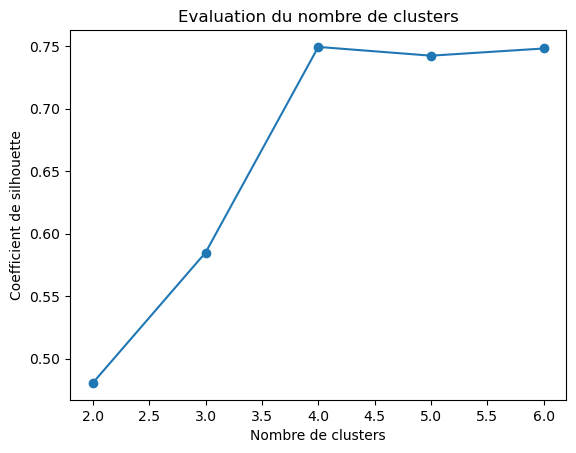

In [84]:
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Extraction des caractéristiques 'x' et 'y'
features = np.array([(row['x'], row['y']) for row in dataset1])

# Conversion des caractéristiques en type float64
features = features.astype(np.float64)

# Utilisation des caractéristiques pour le clustering
#kmeans.fit(features)

min_clusters = 2 # Nombre minimum de clusters
max_clusters = 6 # Nombre maximum de clusters
scores_db = []
scores_silhouette = []
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(features)
    labels = kmeans.labels_
    score_db = davies_bouldin_score(features, labels)
    score_silhouette = silhouette_score(features, labels)
    scores_db.append(score_db)
    scores_silhouette.append(score_silhouette)
# Affichage des résultats
plt.plot(range(min_clusters, max_clusters + 1), scores_db, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Davies-Bouldin")
plt.title("Evaluation du nombre de clusters")
plt.show()
plt.plot(range(min_clusters, max_clusters + 1), scores_silhouette, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Evaluation du nombre de clusters")
plt.show()


## 3 - Clustering agglomératif

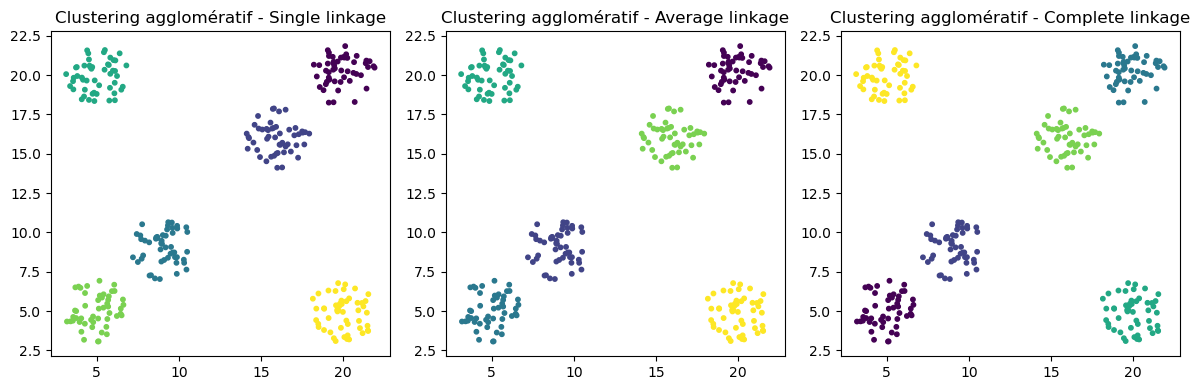

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Choisissez le jeu de données souhaité
# Par exemple, pour le fichier "dataset1.arff":
data, meta = arff.loadarff(open('data/spherical_6_2.arff', 'r'))
data = np.array([list(item)[:-1] for item in data])
# Appliquer une méthode de clustering agglomératif
k = 6 # Nombre de clusters attendus
# Single linkage
clustering_single = AgglomerativeClustering(n_clusters=k, linkage='single')
labels_single = clustering_single.fit_predict(data)
# Average linkage
clustering_average = AgglomerativeClustering(n_clusters=k, linkage='average')
labels_average = clustering_average.fit_predict(data)
# Complete linkage
clustering_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
labels_complete = clustering_complete.fit_predict(data)
                                # Visualiser les clusters
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(data[:, 0], data[:, 1], c=labels_single, s=10)
plt.title("Clustering agglomératif - Single linkage")
plt.subplot(132)
plt.scatter(data[:, 0], data[:, 1], c=labels_average, s=10)
plt.title("Clustering agglomératif - Average linkage")
plt.subplot(133)
plt.scatter(data[:, 0], data[:, 1], c=labels_complete, s=10)
plt.title("Clustering agglomératif - Complete linkage")
plt.tight_layout()
plt.show()


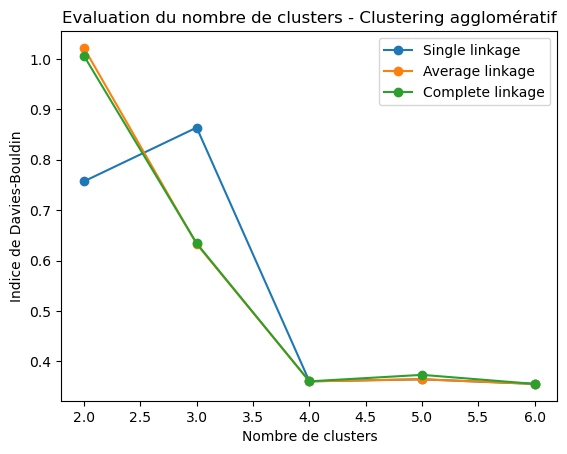

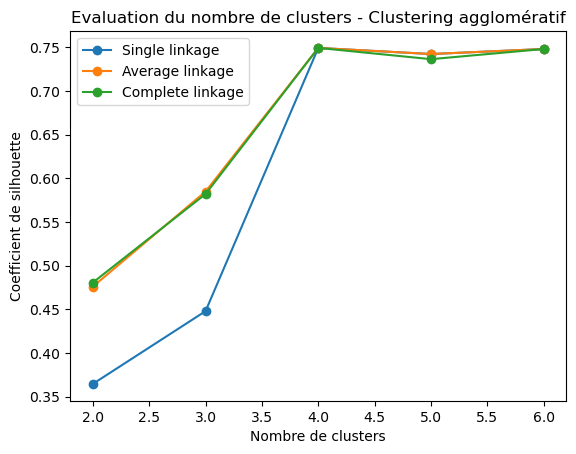

In [86]:
# Détermination automatique du nombre de clusters
# Utilisation des métriques d'évaluation : Indice de Davies-Bouldin et␣ Coefficient de silhouette
min_clusters = 2 # Nombre minimum de clusters
max_clusters = 6 # Nombre maximum de clusters
scores_db = []
scores_silhouette = []
# Suite du code...
for k in range(min_clusters, max_clusters + 1):
    # Single linkage
    clustering_single = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels_single = clustering_single.fit_predict(data)
    score_db_single = davies_bouldin_score(data, labels_single)
    score_silhouette_single = silhouette_score(data, labels_single)
    # Average linkage
    clustering_average = AgglomerativeClustering(n_clusters=k, linkage='average')
    labels_average = clustering_average.fit_predict(data)
    score_db_average = davies_bouldin_score(data, labels_average)
    score_silhouette_average = silhouette_score(data, labels_average)
    # Complete linkage
    clustering_complete = AgglomerativeClustering(n_clusters=k,linkage='complete')
    labels_complete = clustering_complete.fit_predict(data)
    score_db_complete = davies_bouldin_score(data, labels_complete)
    score_silhouette_complete = silhouette_score(data, labels_complete)
    scores_db.append([score_db_single, score_db_average, score_db_complete])
    scores_silhouette.append([score_silhouette_single, score_silhouette_average,score_silhouette_complete])
# Affichage des résultats
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_db)[:, 0],marker='o', label='Single linkage')
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_db)[:, 1], marker='o', label='Average linkage')
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_db)[:, 2],marker='o', label='Complete linkage')
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Davies-Bouldin")
plt.title("Evaluation du nombre de clusters - Clustering agglomératif")
plt.legend()
plt.show()
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_silhouette)[:,0], marker='o', label='Single linkage')
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_silhouette)[:,1], marker='o', label='Average linkage')
plt.plot(range(min_clusters, max_clusters + 1), np.array(scores_silhouette)[:,2], marker='o', label='Complete linkage')
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Evaluation du nombre de clusters - Clustering agglomératif")
plt.legend()
plt.show()



## 4- Clustering DBSCAN

Jeu de données 1:
Meilleurs paramètres:
min_samples: 2, eps: 0.1
Score de silhouette correspondant: 0.6048097709408673

Jeu de données 2:
Meilleurs paramètres:
min_samples: 5, eps: 1.0
Score de silhouette correspondant: 0.7398095636144507



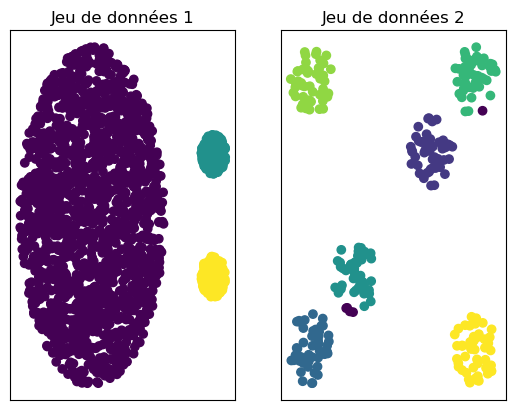

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt

# Charger les jeux de données à partir des fichiers ARFF
data1, _ = arff.loadarff(open('data/cure-t0-2000n-2D.arff', 'r'))
dataset1 = np.array(data1.tolist(), dtype=np.float64)

data2, _ = arff.loadarff(open('data/spherical_6_2.arff', 'r'))
dataset2 = np.array(data2.tolist(), dtype=np.float64)

# Liste des jeux de données
datasets = [dataset1, dataset2]

for i, dataset in enumerate(datasets):
    print(f"Jeu de données {i+1}:")
    best_score = -1
    best_params = None
    
    # Appliquer DBSCAN avec des valeurs "au hasard" pour min_samples et eps
    for min_samples in range(2, 6):
        for eps in np.arange(0.1, 1.1, 0.1):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dataset)
            
            # Vérifier si le clustering a réussi
            if len(np.unique(labels)) > 1:
                score = silhouette_score(dataset, labels)
                
                # Mettre à jour les meilleurs paramètres si le score est amélioré
                if score > best_score:
                    best_score = score
                    best_params = (min_samples, eps)
    
    # Afficher les résultats
    plt.subplot(1, 2, i+1)
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
    plt.title(f"Jeu de données {i+1}")
    plt.xticks([])
    plt.yticks([])
    
    print("Meilleurs paramètres:")
    print(f"min_samples: {best_params[0]}, eps: {best_params[1]}")
    print("Score de silhouette correspondant:", best_score)
    print()
plt.show()
